In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

file = 'Downloads/PIDE.xls'
data = pd.read_excel(file, names=['ID','Publication','No','Cell','Type','Phase','Genomic length','Ion','Charge','Mono/SOBP','LET','E','alphax','betax','alpha1','beta1'],delimiter=',')
#dtype=[('ID','S'),('Publication','S'),('No','i2'),('Cell','S'),('Type','S'),('Phase','S'),('Genomic length','i2'),('Ion','S'),('Charge','i2'),('Mono/SOBP','S'),('LET','f4'),('E','f4'),('alphax','f4'),('betax','f4'),('alpha1','f4'),('beta1','f4')]
data2=data.values


,ID,Publication,No,Cell,Type,Phase,Genomic length,Ion,Charge,Mono/SOBP,LET,E,alphax,betax,alpha1,beta1
0,51.0,persson02,2,AA,t,a,6.0,10B,5,m,80.00,15.30,0.047,0.0480,0.238,0.3340
1,51.0,persson02,3,AA,t,a,6.0,10B,5,m,160.00,6.60,0.047,0.0480,0.712,0.2260
2,51.0,persson02,1,AA,t,a,6.0,10B,5,m,40.00,36.60,0.047,0.0480,0.206,0.1510
3,20.0,bird75,3,V79,n,a,5.6,11B,5,m,129.50,9.17,0.247,0.0133,1.184,0.0207
4,40.0,cox79,4,HF19,n,a,6.0,11B,5,m,110.00,10.30,0.797,0.0000,2.960,0.0000
5,40.0,cox79,5,HF19,n,a,6.0,11B,5,m,160.00,6.60,0.797,0.0000,2.790,0.0000
6,40.0,cox79,6,HF19,n,a,6.0,11B,5,m,200.00,5.00,0.797,0.0000,2.000,0.0000
7,43.0,thacker79,4,V79,n,a,5.6,11B,5,m,110.00,10.30,0.121,0.0310,0.906,0.0000
8,43.0,thacker79,5,V79,n,a,5.6,11B,5,m,200.00,5.00,0.121,0.0310,1.259,0.0000
9,62.0,todd75,5,M3-1,n,a,5.6,11B,5,m,165.00,6.30,0.211,0.0410,0.096,0.4290


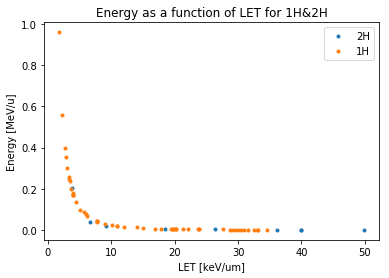

In [2]:
plt.title("Energy as a function of LET for 1H&2H")
plt.xlabel("LET [keV/um]")
plt.ylabel("Energy [MeV/u]")


cond = data2[:,7] == "2H"
x = data2[:,-6][cond]
y = data2[:,-5][cond]


cond2 = data2[:,7] == "1H"
x2 = data2[:,-6][cond2]
y2 = data2[:,-5][cond2]



class ERSCalc(object):
    """
    A 'calculator' class for stopping power and range of protons
    """
    alpha_cm_MeV = 0.0022
    p = 1.77

    @classmethod
    def range_cm(cls, energy_MeV):
        """
        Bragg-Kleeman rule for energy-range relationship
        Equation (8) in [1]
        """
        return cls.alpha_cm_MeV * energy_MeV ** cls.p

    @classmethod
    def stop_pow_MeV_cm(cls, resid_range_cm):
        """Bortfeld approximation for stopping power of protons"""
        return (resid_range_cm ** (1.0 / cls.p - 1.0)) / (cls.p * cls.alpha_cm_MeV ** (1.0 / cls.p))



plt.plot(x,ERSCalc.range_cm(y),'.',label="2H")
plt.plot(x2,ERSCalc.range_cm(y2),'.',label="1H")
plt.legend(loc="upper right")
#plt.yscale('log')

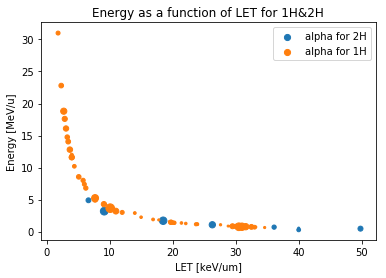

In [3]:

plt.title("Energy as a function of LET for 1H&2H")
plt.xlabel("LET [keV/um]")
plt.ylabel("Energy [MeV/u]")


cond = data["Ion"] == "2H"
x = data["LET"][cond]
y = data["E"][cond]
alpha=data["alpha1"].values*20


cond2 = data["Ion"] == "1H"
x2 = data["LET"][cond2]
y2 = data["E"][cond2]



plt.scatter(x,y,label="alpha for 2H",s=alpha)
plt.scatter(x2,y2,label="alpha for 1H",s=alpha)
plt.legend(loc="upper right")
plt.show()

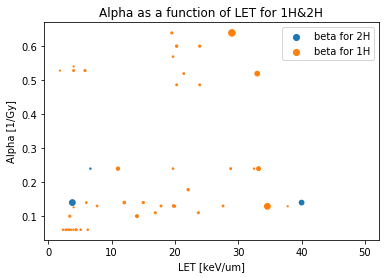

In [4]:
plt.title("Alpha as a function of LET for 1H&2H")
plt.xlabel("LET [keV/um]")
plt.ylabel("Alpha [1/Gy]")


cond = data["Ion"] == "2H"
x = data["LET"][cond]
y = data["alphax"][cond]
beta=data["beta1"].values*100


cond2 = data["Ion"] == "1H"
x2 = data["LET"][cond2]
y2 = data["alphax"][cond2]



plt.scatter(x,y,label="beta for 2H",s=beta)
plt.scatter(x2,y2,label="beta for 1H",s=beta)
plt.legend(loc="upper right")


plt.show()

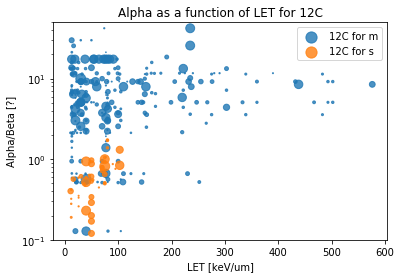

In [5]:

#what we want to compare f.ex. "Ion" and value f.ex. value for Ion is "12C"
#first camparison
var1 = "Ion"
res1 = "12C"

#the second comparison
var2 = "Mono/SOBP"
res2 = "m"
res4 = "s"

#axis x and y and third data which is a size of scatters
xt = "LET"
yt = "alpha1"
size = "E"

#graph 1
cond1 = (data[var1] == res1) & (data[var2] == res2)

alp = data["alphax"][cond1]
bet = data["betax"][cond1]
fact = alp[bet>0] / bet[bet>0]

x = data[xt][cond1][bet>0]
y = fact

#graph 2
cond3 = data[var1] == res1
cond4 = data[var2] == res4
x2 = data[xt][cond3][cond4]
y2 = data[yt][cond3][cond4]


plt.title("Alpha as a function of LET for "+str(res1))
plt.xlabel("LET [keV/um]")
plt.ylabel("Alpha/Beta [?]")

plt.scatter(x,y,label=str(res1+ " for " +res2),s=data[size].values/4,alpha=0.8)
plt.scatter(x2,y2,label=str(res1+ " for " +res4),s=data[size].values/4,alpha=0.8)
plt.legend(loc="upper right")
plt.ylim(0.1,50)
plt.yscale('log')

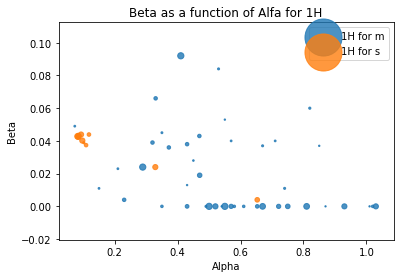

In [6]:
#what we want to compare f.ex. "Ion" and value f.ex. value for Ion is "12C"
#first camparison
var1 = "Ion"
res1 = "1H"

#the second comparison
var2 = "Mono/SOBP"
res2 = "m"
res4 = "s"

#axis x and y and third data which is a size of scatters
xt = "alpha1"
yt = "beta1"
size = "LET"

#graph 1
cond1 = data[var1] == res1
cond2 = data[var2] == res2
x = data[xt][cond1][cond2]
y = data[yt][cond1][cond2]

#graph 2
cond3 = data[var1] == res1
cond4 = data[var2] == res4
x2 = data[xt][cond3][cond4]
y2 = data[yt][cond3][cond4]


plt.title("Beta as a function of Alfa for "+str(res1))
plt.xlabel("Alpha")
plt.ylabel("Beta")

plt.scatter(x,y,label=str(res1+ " for " +res2),s=data[size].values/6,alpha=0.8)
plt.scatter(x2,y2,label=str(res1+ " for " +res4),s=data[size].values/6,alpha=0.8)
plt.legend(loc="upper right")
plt.show()